<a href="https://colab.research.google.com/github/gemdata0/Insurance-Prediction-/blob/main/Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://zindi.africa/competitions/insurance-prediction-challenge/data

#**Loading the data**

**importing libraries**

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**loading and viewing the data**

In [ ]:
data = pd.read_csv('train_data.csv')
data.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


**data dimensions**

In [ ]:
data.shape

# There are 14 columns and 7160 rows

(7160, 14)

**checking for more information of the data**

In [ ]:
data.info()

# There are 14 columns and 7160 rows 
# Data types are floats, integers and objects 
# There are missing values in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


**statistical description of the data**

In [ ]:
data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


**checking null values**

In [ ]:
data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

**dropping the null values**

In [ ]:
# Percentage of missing values in the data

(7160-6543)/7160*100

8.61731843575419

In [ ]:
data = data.dropna()

# We have dropped the missing values since they do not account to large part of the data. They account to only 8.617% of the whole data

**checking for duplicated values**

In [ ]:
data.duplicated().sum()

# There are no duplicated values in the data

0

**checking for outliers in the data**

In [ ]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
outliers = data[((data < (q1 - 1.5*iqr))|(data > (q3 + 1.5*iqr)))]
outliers.count()

# There are 3 columns with outliers.

Customer Id              0
YearOfObservation        0
Insured_Period        1622
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                   0
Settlement               0
Building Dimension     484
Building_Type            0
Date_of_Occupancy      884
NumberOfWindows          0
Geo_Code                 0
Claim                 1511
dtype: int64

**visualizing the outliers**

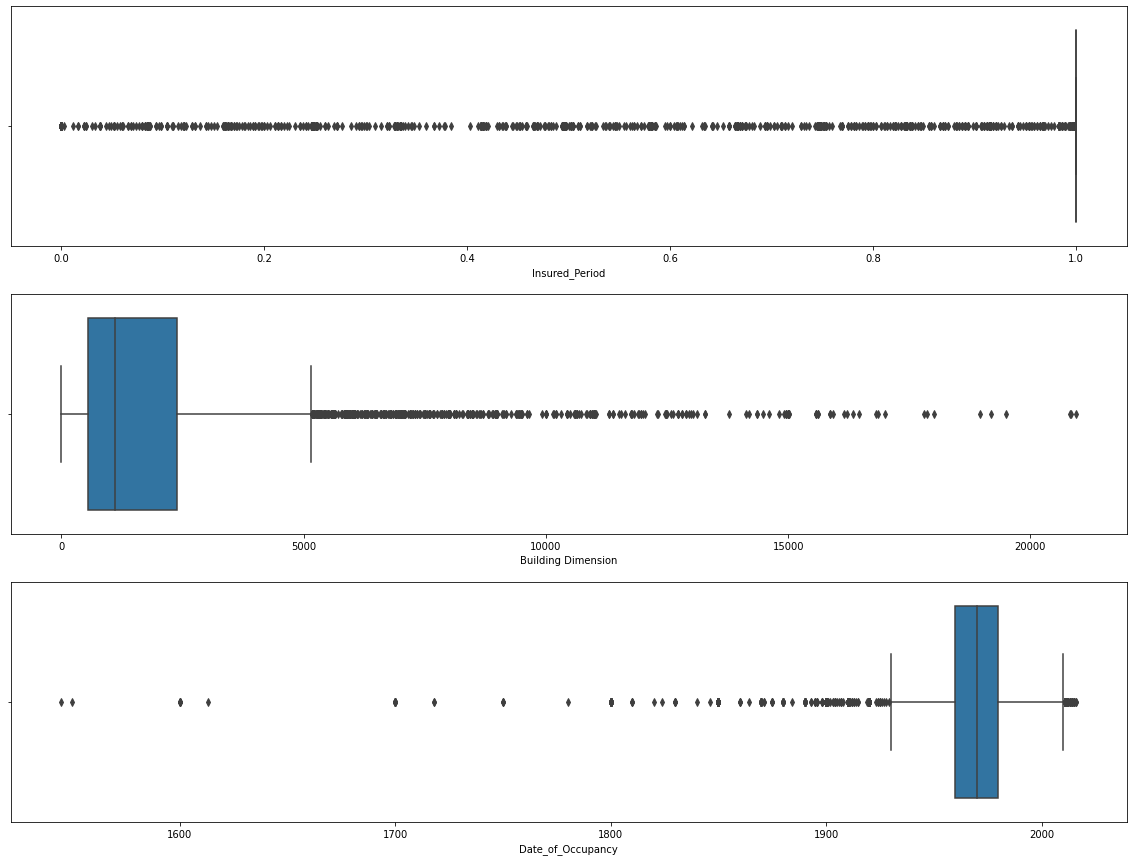

In [ ]:
types = data[['Insured_Period', 'Building Dimension', 'Date_of_Occupancy']] 
fig, axes = plt.subplots(3, 1, figsize = (20,15))
for cols, ax in zip(types, axes.flatten()):
  sns.boxplot(data[cols], ax = ax);


# We will not be doing anything to the outliers as it is possible for these observations to occur.  

#**Data Visualization**

**visualization of the target column**

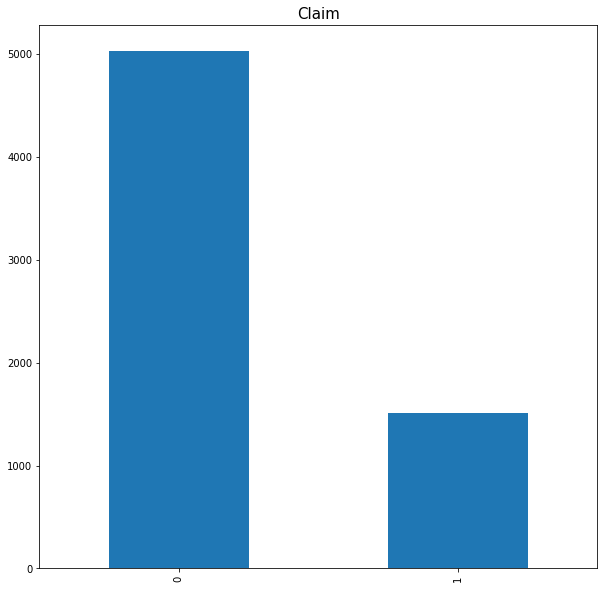

In [ ]:
fig, axes = plt.subplots(figsize = (10,10))
data['Claim'].value_counts().plot(kind = 'bar')
plt.title('Claim', size = 15);

# 0 - No claim
# 1 - Atleast 1 or more claims 

# The number of no claims is higher that those who made atleast one claim.
# There is large class imbalance which will need to corrected later on.

**insured period**

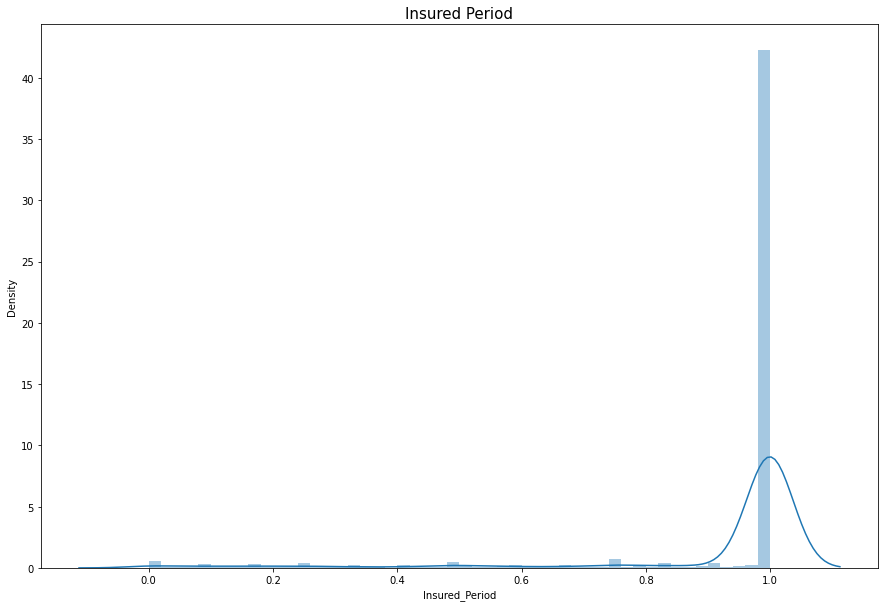

In [ ]:
fig, axes = plt.subplots(figsize = (15,10))
sns.distplot(data['Insured_Period'])
plt.title('Insured Period', size = 15);

# A distribution of when claims happened if a policy was claimed.
# Most policies were not claimed for the whole period of one year.
# The number of insured polices that were claimed before the end of one year were little.

**categorical data**

In [ ]:
data.nunique()

Customer Id           6543
YearOfObservation        5
Insured_Period         374
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building Dimension    1969
Building_Type            4
Date_of_Occupancy      134
NumberOfWindows         11
Geo_Code              1254
Claim                    2
dtype: int64

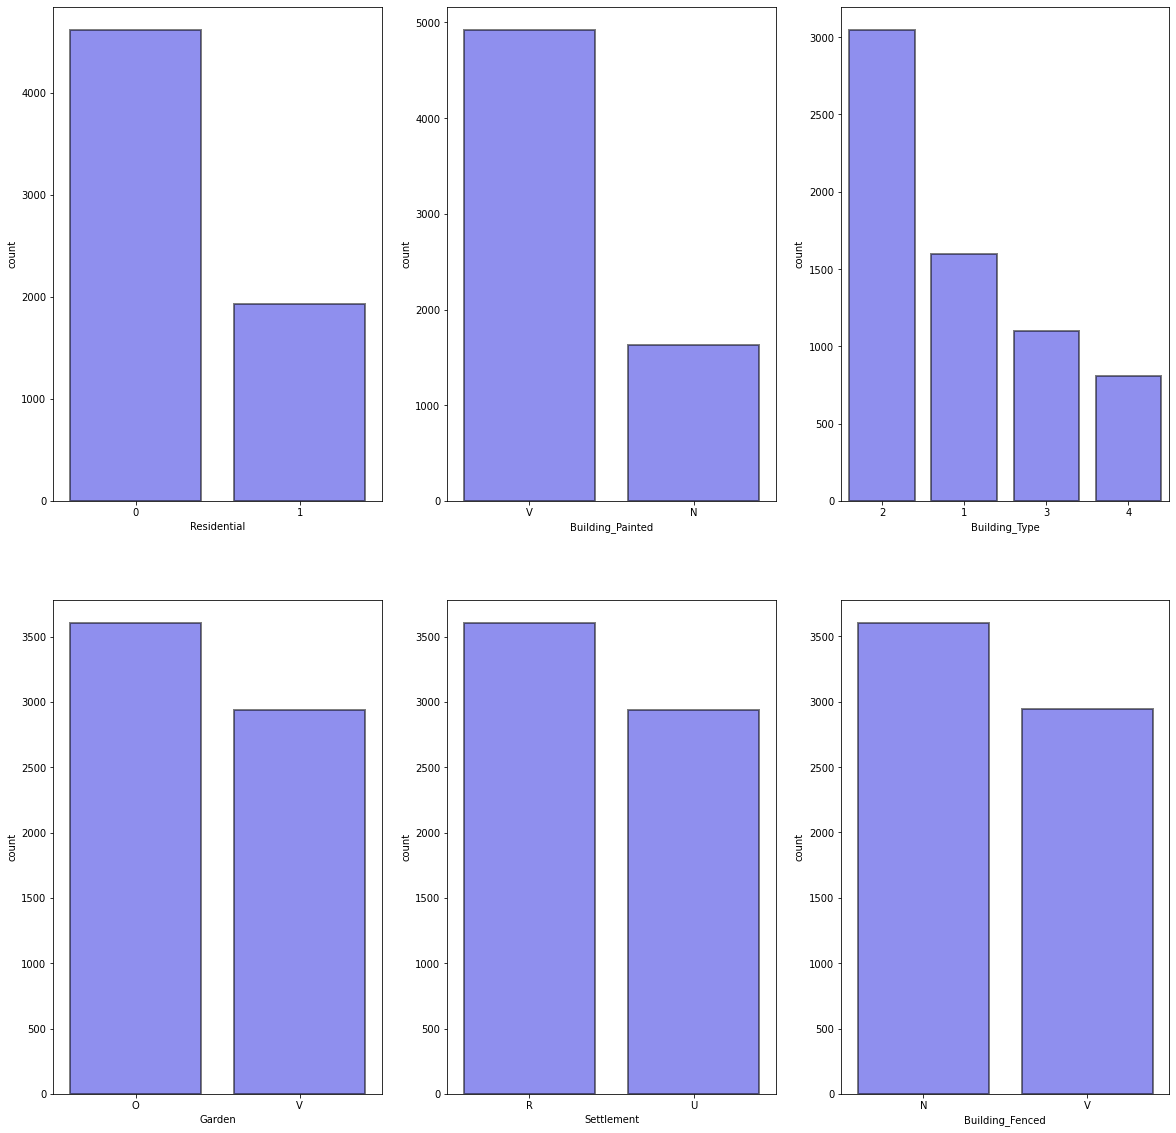

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (20,20))
visuals_1 = data[['Residential', 'Building_Painted', 'Building_Type', 'Garden', 'Settlement', 'Building_Fenced']]
for cols, ax in zip(visuals_1, axes.flatten()):
  sns.countplot(data[cols], ax = ax, order = data[cols].value_counts().index, color = 'blue', alpha = 0.5, linewidth = 2, edgecolor = 'black');

# Garden, Settlemet and Building Fenced had an almost equal number of observations.

**year of observation**

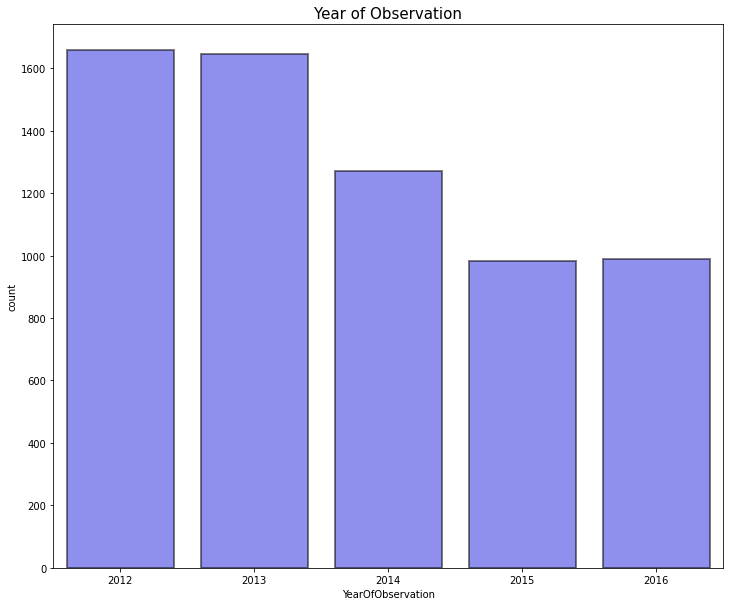

In [ ]:
fig, axes = plt.subplots(figsize = (12,10))
sns.countplot(data['YearOfObservation'], color = 'blue', alpha = 0.5, linewidth = 2, edgecolor = 'black')
plt.title('Year of Observation', size = 15);

# 2012 had the most observations/ policies while 2016 had the least observations 
# The number of policies acquaired over the years reduced.

**Number of windows**

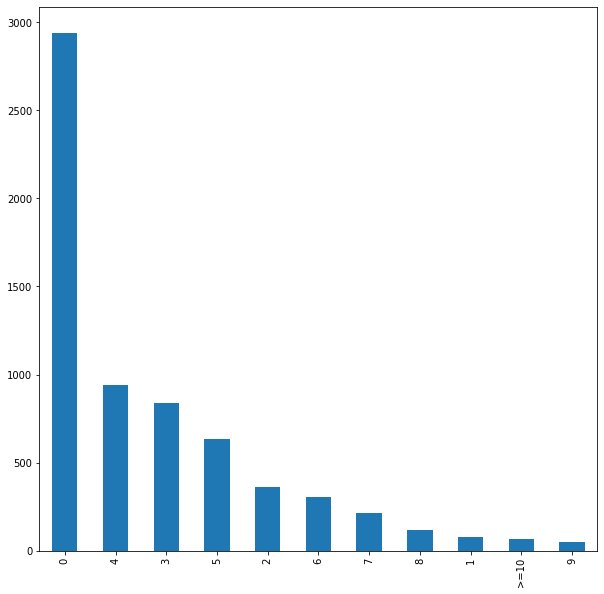

In [ ]:
# Replacing the dots with '   .' with '0' and plotting.
data['NumberOfWindows'].replace('   .', '0', inplace = True)
fig, axes = plt.subplots(figsize = (10,10))
data['NumberOfWindows'].value_counts().plot(kind = 'bar');

# Most houses did not have windows while houses with 9 windows were the least.

In [ ]:
#!pip install geopandas
#!pip install geopy

#Question: How to plot zipcodes.

#**Bi-variate Analysis**

**Different columns against claims**

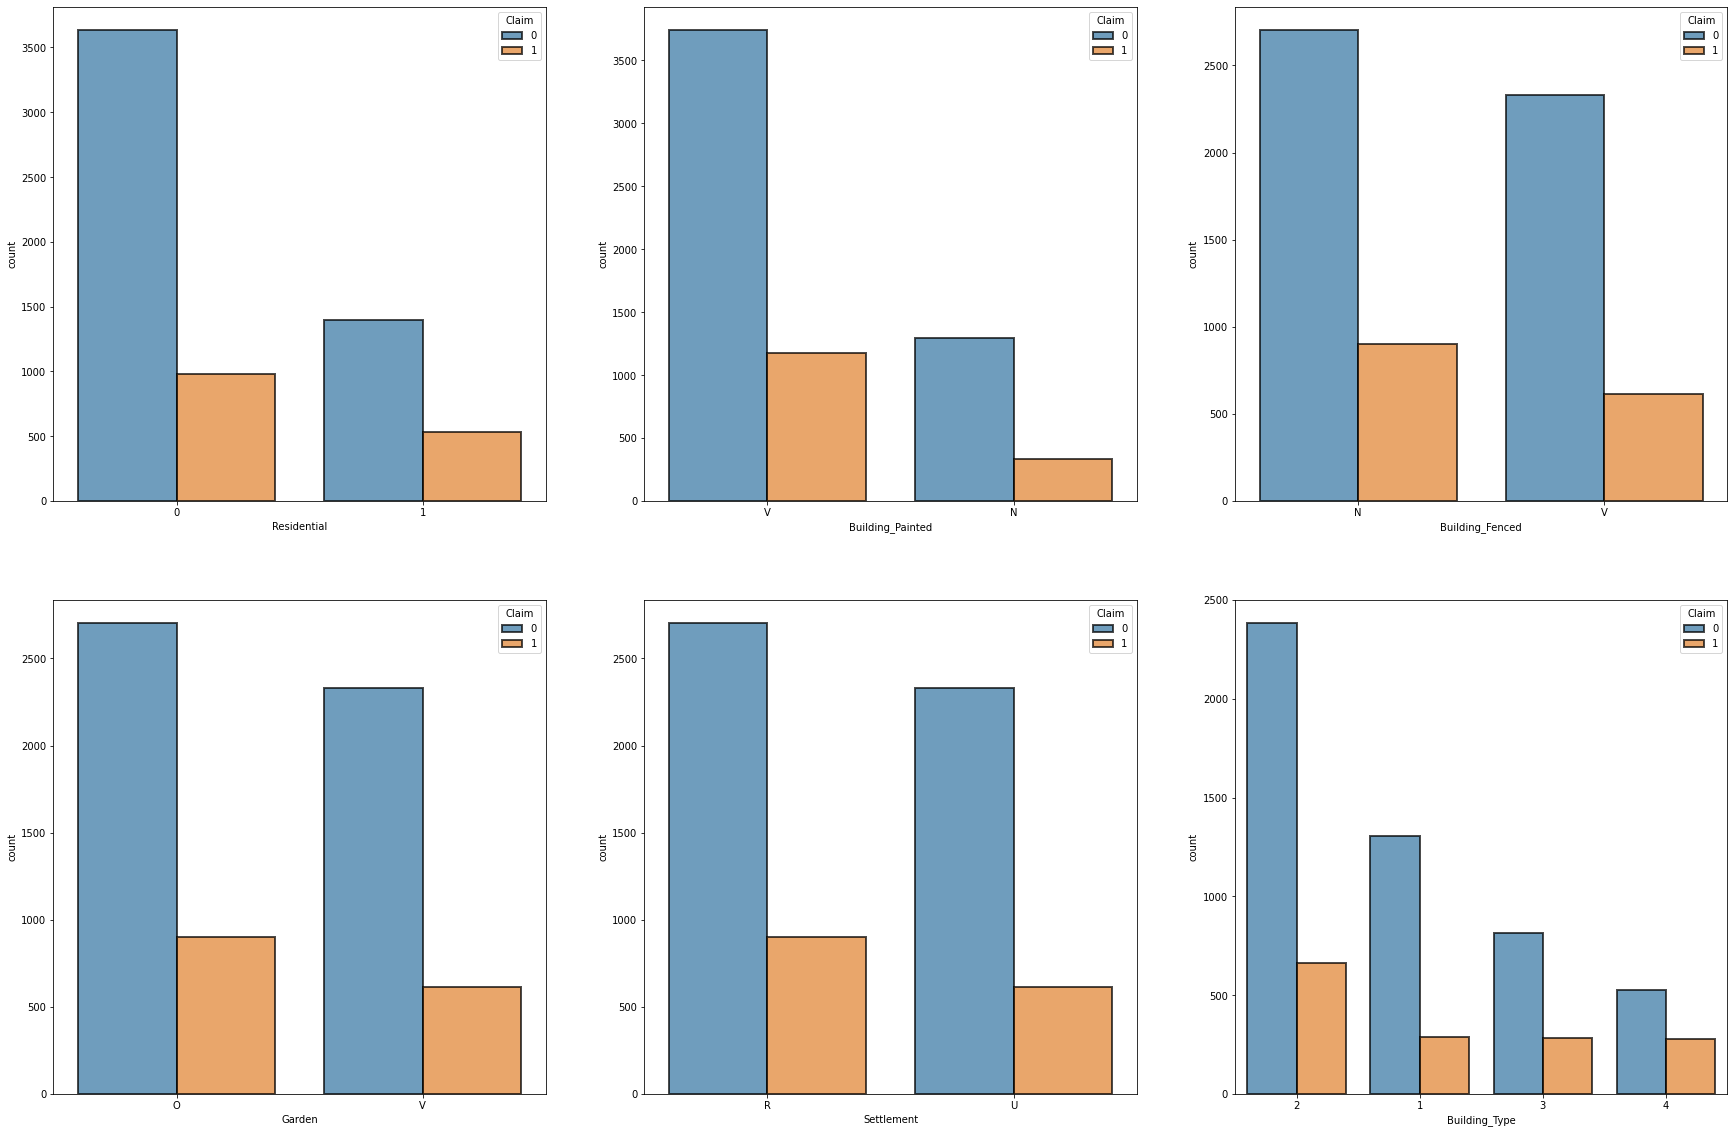

In [ ]:
visuals2 = data[['Residential','Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type']]
fig, axes = plt.subplots(2, 3, figsize = (30,20))
for cols, ax in zip(visuals2, axes.flatten()):
  sns.countplot(x = data[cols], hue = data['Claim'], ax =ax, order = data[cols].value_counts().index, alpha = 0.7, linewidth = 2, edgecolor = 'black');

**label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = data.select_dtypes('object').columns
data[cols] = data[cols].apply(le.fit_transform)
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,1031,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0,7,0
1,3887,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,7,0
2,4659,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0,7,0
3,4673,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0,7,0
4,5336,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3,7,0


**dropping Customer ID**

In [ ]:
data = data.drop(['Customer Id'], axis = True)

**correlation heat map**

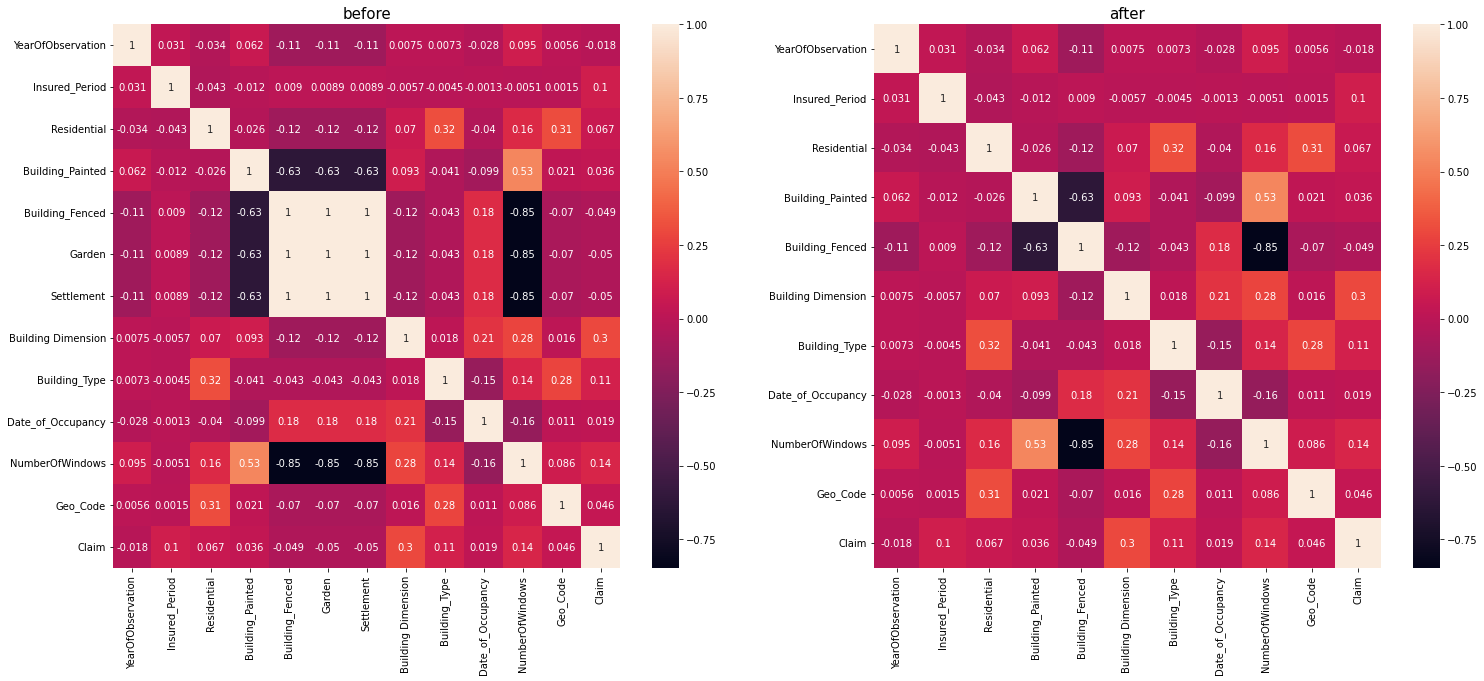

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (25,10))
# correlation heatmap before dropping most related columns. 
sns.heatmap(data.corr(), ax = axes[0], annot = True)
axes[0].set_title('before', size = 15)

# dropping the most related columns.
data = data.drop(['Garden', 'Settlement'], axis = True)

# correlation heatmap after dropping most related columns.
sns.heatmap(data.corr(), ax = axes[1], annot = True)
axes[1].set_title('after', size = 15);

#**Modelling**

**defining the variables**

In [ ]:
x = data.drop(['Claim'], axis = True)
y = data[['Claim']]

**training and testing the data** 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.3)

**SMOTE for class imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

**feature selection**

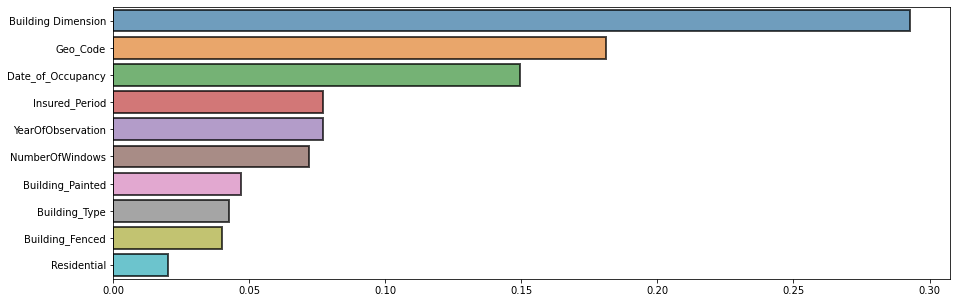

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

feature_importance = pd.Series(rfc.feature_importances_, x.columns).sort_values(ascending = False)
fig, axis = plt.subplots(figsize = (15,5))
sns.barplot(feature_importance, feature_importance.index, linewidth = 2, edgecolor = 'black', alpha = 0.7); 

# We will use all the columns in the analysis.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.3)

**Models to use**
1. Logistic regression (BaseLine Model)

2. Random Forest Classifier

3. Naive Bayes 

4. KNN


**1. logistic regression (baseline model)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1499
           1       0.63      0.14      0.24       464

    accuracy                           0.78      1963
   macro avg       0.71      0.56      0.55      1963
weighted avg       0.75      0.78      0.72      1963



**2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1499
           1       0.48      0.23      0.31       464

    accuracy                           0.76      1963
   macro avg       0.64      0.58      0.58      1963
weighted avg       0.72      0.76      0.73      1963



**3. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1499
           1       0.49      0.30      0.37       464

    accuracy                           0.76      1963
   macro avg       0.65      0.60      0.61      1963
weighted avg       0.73      0.76      0.74      1963



**4. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1499
           1       0.43      0.25      0.32       464

    accuracy                           0.74      1963
   macro avg       0.61      0.57      0.58      1963
weighted avg       0.71      0.74      0.72      1963



**5. SVM**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1499
           1       0.57      0.11      0.18       464

    accuracy                           0.77      1963
   macro avg       0.67      0.54      0.52      1963
weighted avg       0.73      0.77      0.70      1963



**From this - Logistic Regression - gives the best accuracy which is what we will use for further prediction**

#**Test Data**

**data loading**

In [ ]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


**data cleaning**

In [ ]:
# Removing null values in the data 
test_data = test_data.dropna()

In [ ]:
test_data = test_data.drop(['Settlement', 'Garden'], axis = 1)

In [ ]:
test_data['NumberOfWindows'].replace('   .', '0', inplace = True)

**label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = test_data[['NumberOfWindows', 'Geo_Code', 'Building_Painted', 'Building_Fenced']].columns
test_data[cols] = test_data[cols].apply(le.fit_transform)
test_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,1,0,300.0,1,1960.0,3,142
1,H11921,2016,0.997268,0,1,0,300.0,1,1960.0,3,142
2,H9805,2013,0.369863,0,1,1,790.0,1,1960.0,0,142
3,H7493,2014,1.000000,0,1,0,1405.0,1,2004.0,3,143
4,H7494,2016,1.000000,0,1,0,1405.0,1,2004.0,3,143


**changing to csv**

In [ ]:
test_data.to_csv(r'C:\Users\USER\Desktop\projects\Insurance prediction\test_data.csv')

**loading new csv data**

In [ ]:
test_1 = pd.read_csv('test_1.csv')
test_1 = test_1.drop(['Unnamed: 0'], axis = True)
test_1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,1,0,300.0,1,1960.0,3,142
1,H11921,2016,0.997268,0,1,0,300.0,1,1960.0,3,142
2,H9805,2013,0.369863,0,1,1,790.0,1,1960.0,0,142
3,H7493,2014,1.000000,0,1,0,1405.0,1,2004.0,3,143
4,H7494,2016,1.000000,0,1,0,1405.0,1,2004.0,3,143


**prediction**

In [ ]:
y = test_1.drop(['Customer Id'], axis = 1)

In [ ]:
y_pred = lr.predict(y)

ValueError: ignored

In [ ]:
prediction = pd.DataFrame(y_pred) 

In [ ]:
test_1['prediction'] = prediction 
test_1

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,prediction
0,H11920,2013,1.000000,0,1,0,300.0,1,1960.0,3,127,0
1,H11921,2016,0.997268,0,1,0,300.0,1,1960.0,3,127,0
2,H9805,2013,0.369863,0,1,1,790.0,1,1960.0,0,127,0
3,H7493,2014,1.000000,0,1,0,1405.0,1,2004.0,3,128,0
4,H7494,2016,1.000000,0,1,0,1405.0,1,2004.0,3,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2319,H8261,2015,1.000000,0,1,0,1690.0,3,1800.0,7,98,0
2320,H8264,2012,1.000000,0,0,1,800.0,3,1960.0,0,98,0
2321,H8273,2012,1.000000,0,1,1,1500.0,3,1960.0,0,98,0
2322,H8280,2014,1.000000,0,0,1,3343.0,3,1980.0,0,99,0


**converting to csv**

In [ ]:
# This is the final copy.
test_1.to_excel(r'C:\Users\USER\Desktop\projects\Insurance prediction\y_pred.xlsx', index = False)